# Support Vector Machine- SVM

In [5]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [6]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Making a Dataframe out of above dataset

In [8]:
df = pd.DataFrame(iris.data, columns= iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [12]:
df['flower_name']= df.target.apply(lambda x: iris.target_names[x]) #df.target.apply function will generate a new column from
                                                             # another column.
                                                              # lambda is a function that will generate a new column.
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Data Visualization

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

In [15]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


Text(0, 0.5, 'Sepal Length')

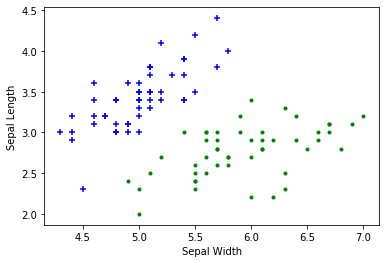

In [16]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='blue', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color ='green', marker ='.')
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')

Text(0, 0.5, 'petal Length')

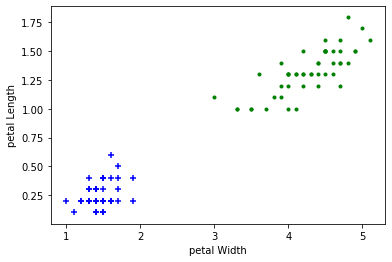

In [17]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='blue', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color ='green', marker ='.')
plt.xlabel('petal Width')
plt.ylabel('petal Length')

## Training the Model

In [18]:
from sklearn.model_selection import train_test_split


In [19]:
X =df.drop(['target', 'flower_name'], axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
y = df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [22]:
len(X_train)

120

In [23]:
len(X_test)

30

In [24]:
from sklearn.svm import SVC
model = SVC(kernel='linear') #you can modify the parameters to improve the accuracy of the model

In [25]:
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [26]:
model.score(X_test,y_test)

0.9666666666666667

In [34]:
model.predict([[7.1,3.3,6.0,2.5]])

array([2])